In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=sk---------sk-tso-0001entrystorage,sk---------sk-tso-0001entrytransmission,sk---------sk-tso-0001entrytransmissionat---------,sk---------sk-tso-0001entrytransmissioncz---------,sk---------sk-tso-0001entrytransmissionhu---------,sk---------sk-tso-0001exitstorage,sk---------sk-tso-0001exittransmission,sk---------sk-tso-0001exittransmissionat---------,sk---------sk-tso-0001exittransmissioncz---------,sk---------sk-tso-0001exittransmissionhu---------&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesSKSK---------SK-TSO-0001entryTransm...        1   Aggregates   
1    1AggregatesSKSK---------SK-TSO-0001entryTransm...        1   Aggregates   
2    1AggregatesSKSK---------SK-TSO-0001entryTransm...        1   Aggregates   
3    1AggregatesSKSK---------SK-TSO-0001entryTransm...        1   Aggregates   
4    1AggregatesSKSK---------SK-TSO-0001exitTransmi...        1   Aggregates   
..                                                 ...      ...          ...   
243  1AggregatesSKSK---------SK-TSO-0001entryTransm...        1   Aggregates   
244  1AggregatesSKSK---------SK-TSO-0001exitTransmi...        1   Aggregates   
245  1AggregatesSKSK---------SK-TSO-0001exitTransmi...        1   Aggregates   
246  1AggregatesSKSK---------SK-TSO-0001exitTransmi...        1   Aggregates   
247  1AggregatesSKSK---------SK-TSO-0001exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day       value
0          entry    2   880387919
1          entry    2           0
2          entry    2   412456121
3          entry    2           0
4           exit    2    27669295
..           ...  ...         ...
243        entry    1           0
244         exit    1           0
245         exit    1  1040849198
246         exit    1           0
247         exit    1    10995000

[248 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         2.940036e+08
    exit          2.629610e+08
2   entry         3.232110e+08
    exit          2.954515e+08
3   entry         3.236455e+08
...                        ...
29  exit          2.664403e+08
30  entry         3.209960e+08
    exit          2.859219e+08
31  entry         3.215661e+08
    exit          2.887633e+08

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

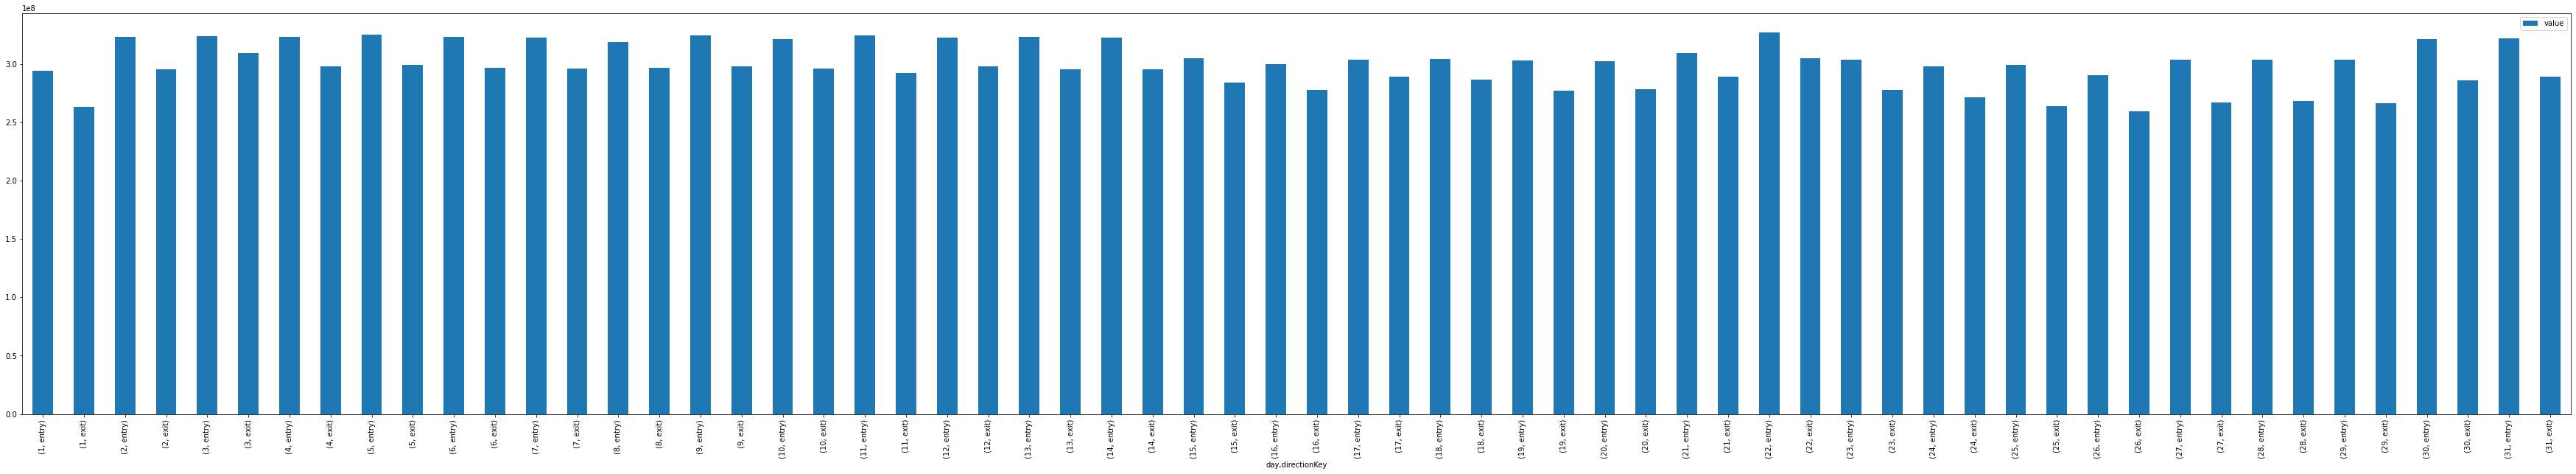

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))